### Holt Winter Multiplicative method

$\hat{y}_{t+1} = (l_t + b_t)* s_{t+1-m}$
<br>
$l_t = \alpha*\frac{y_t}{s_{t-m}} + (1-\alpha)*(l_{t-1} + b_{t-1})$
<br>
$b_t = \beta*(l_t - l_{t-1}) + (1-\beta)*b_{t-1}$
<br>
$s_t = \gamma*\frac{y_t}{(l_{t-1} + b_{t-1})} + (1-\gamma)*s_{t-m}$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [5]:
#read data from file
df = pd.read_csv(r'./data/airline-traffic.csv', header=None)

#rename column headers
df.columns  =['Month', 'Passengers']

# make month column as datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Change month column as index
df.set_index('Month', inplace=True)

# impute missing values by linear interpolate 
df.Passengers.interpolate(method='linear', inplace=True)

# change datatype of passengers as int
df['Passengers'] = df['Passengers'].astype('int')

### Split data into train , test
train =  df[0:120]
test  =  df[120:]

In [6]:
## Holt Winter Multiplicative method with Trend and Seasonality
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train.Passengers), seasonal_periods=12, \
                             trend='add', seasonal='mul')

model_fit = model.fit(optimized=True)

print(model_fit.params)

y_hat_hwm['forecast_hwm'] = model_fit.forecast(len(test))

{'smoothing_level': 0.38297792357726124, 'smoothing_slope': 0.035502695358352605, 'smoothing_seasonal': 0.6170220681283785, 'damping_slope': nan, 'initial_level': 212.3983506469908, 'initial_slope': 1.095376632423797, 'initial_seasons': array([0.51702061, 0.5454338 , 0.60215765, 0.56916567, 0.51982655,
       0.57235007, 0.62776238, 0.62555286, 0.57005795, 0.49511555,
       0.43967716, 0.51387414]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Text(0.5, 1.0, 'Holt Winter Multiplicative')

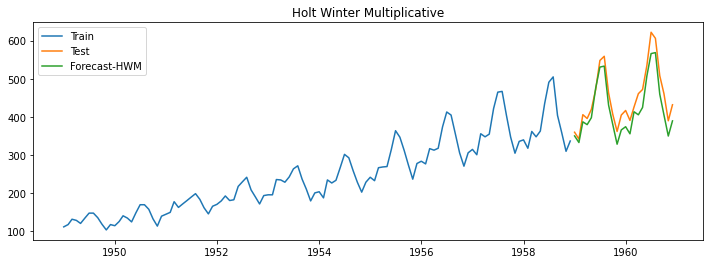

In [7]:
# plot
plt.figure(figsize=(12, 4))

plt.plot(train.Passengers, label='Train')
plt.plot(test.Passengers, label='Test')
plt.plot(y_hat_hwm['forecast_hwm'], label='Forecast-HWM')

plt.legend()
plt.title('Holt Winter Multiplicative')

In [8]:
# error
error = y_hat_hwm.iloc[:, 0] - y_hat_hwm.iloc[:, 1]

rmse = np.sqrt((np.sum(error**2))/len(error))
mape = (np.sum(abs(error) / y_hat_hwm.iloc[:,0])) * 100 / len(error)

print(f"RMSE: {rmse}, MAPE:{mape}")

RMSE: 34.87445271619706, MAPE:6.920640351879112
